In [230]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# Loading Cleaned Data

In [231]:
df = pd.read_csv('../datasets/apartments_collective.csv')

# Data Processing for Machine Learning

In [232]:
df.head(10)

,Unnamed: 0,url,name/title,address,price,area,price-per-area,floor/store,no of floors/stores in the building,no of rooms,year of construction,parking space,market,form of ownership,location,latitude,longitude,distance,district
0,0,https://krakow.nieruchomosci-online.pl/mieszka...,Mieszkanie Kraków,"103171, Mistrzejowice, Kraków, małopolskie",1087000.0,74.80,14532.09,6,7,3,2016.0,True,wtórny,pełna własność,"Mistrzejowice, Kraków, województwo małopolskie...",50.097426,20.009603,6.500728,Mistrzejowice
1,1,https://krakow.nieruchomosci-online.pl/mieszka...,Mieszkanie Kraków,"2 Pułku Lotniczego, Kraków, małopolskie",550000.0,32.00,17187.50,4,8,1,2012.0,False,wtórny,pełna własność,"2, Osiedle 2 Pułku Lotniczego, Czyżyny, Kraków...",50.077806,20.012307,5.639111,Czyżyny
2,2,https://krakow.nieruchomosci-online.pl/mieszka...,Mieszkanie Kraków,"2 Pułku Lotniczego, Kraków, małopolskie",550000.0,32.30,17028.00,4,10,1,1985.0,False,wtórny,pełna własność,"2, Osiedle 2 Pułku Lotniczego, Czyżyny, Kraków...",50.077806,20.012307,5.639111,Czyżyny
3,3,https://krakow.nieruchomosci-online.pl/mieszka...,"Apartament, ul. 28 Lipca 1943","28 Lipca 1943, Wola Justowska, Kraków, małopol...",2290000.0,155.16,14758.96,0,2,5,2009.0,True,wtórny,pełna własność,"28 Lipca 1943, Wola Justowska, Zwierzyniec, Kr...",50.062710,19.872002,4.662523,Zwierzyniec
4,4,https://krakow.nieruchomosci-online.pl/mieszka...,"Mieszkanie, ul. 28 Lipca 1943","28 Lipca 1943, Wola Justowska, Kraków, małopol...",2399000.0,139.00,17258.99,1,2,3,2022.0,False,wtórny,pełna własność,"28 Lipca 1943, Wola Justowska, Zwierzyniec, Kr...",50.062710,19.872002,4.662523,Zwierzyniec
5,5,https://krakow.nieruchomosci-online.pl/mieszka...,"Apartament, ul. 28 Lipca 1943","28 Lipca 1943, Wola Justowska, Kraków, małopol...",2399000.0,146.68,16355.33,2,2,3,2002.0,True,wtórny,pełna własność,"28 Lipca 1943, Wola Justowska, Zwierzyniec, Kr...",50.062710,19.872002,4.662523,Zwierzyniec
6,6,https://www.otodom.pl/pl/oferta/nowe-mieszkani...,Nowe mieszkania na Górce Narodowej,"29 listopada - okolice, Górka Narodowa, Prądni...",778689.0,61.30,12703.00,1,5,2,2023.0,True,pierwotny,pełna własność,"Aleja 29 Listopada, Górka Narodowa, Prądnik Bi...",50.103296,19.963896,4.983478,Prądnik Biały
7,8,https://www.otodom.pl/pl/oferta/balkon-3-pokoj...,balkon + 3 pokoje + parking,"Adama Vetulaniego, Prądnik Biały, Prądnik Biał...",970000.0,55.00,17636.00,4,7,3,2023.0,True,wtórny,pełna własność,"Adama Vetulaniego, Prądnik Biały, Kraków, woje...",50.095951,19.924784,3.895335,Prądnik Biały
8,9,https://krakow.nieruchomosci-online.pl/mieszka...,"Kawalerka, ul. Agatowa","Agatowa 18, Bieżanów, Kraków, małopolskie",410000.0,28.00,14642.86,0,2,1,1997.0,False,wtórny,spółdzielcze wł. prawo do lokalu,"18, Agatowa, Złocień, Bieżanów-Prokocim, Krakó...",50.021853,20.050650,9.235760,Bieżanów-Prokocim
9,10,https://krakow.nieruchomosci-online.pl/mieszka...,"Mieszkanie, ul. Agatowa","Agatowa, Bieżanów, Kraków, małopolskie",765000.0,48.00,15937.50,3,4,3,2023.0,True,wtórny,pełna własność,"Agatowa, Osiedle Kolejowe, Złocień, Bieżanów-P...",50.022046,20.046131,8.943634,Bieżanów-Prokocim


In [233]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17949 entries, 0 to 17948
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Unnamed: 0                           17949 non-null  int64  
 1   url                                  17949 non-null  object 
 2   name/title                           17949 non-null  object 
 3   address                              17949 non-null  object 
 4   price                                17949 non-null  float64
 5   area                                 17949 non-null  float64
 6   price-per-area                       17949 non-null  float64
 7   floor/store                          17949 non-null  int64  
 8   no of floors/stores in the building  17949 non-null  int64  
 9   no of rooms                          17949 non-null  int64  
 10  year of construction                 17949 non-null  float64
 11  parking space               

In [234]:
# Droping columns unnecesasry/harfull to model performance
# such as: [Unnamed: 0, url, name/title, address, location, latitude, longitude]

columns_to_drop = ['Unnamed: 0', 'url', 'name/title', 'address', 'location', 'latitude', 'longitude']

df = df.drop(columns=columns_to_drop)

In [235]:
# Move 'price' column to the last position
column_order = [col for col in df.columns if col != 'price'] + ['price']

df = df[column_order]

In [236]:
# # Faster alternative if the 'price' column index is known
# cols = df.columns.tolist()
# cols.append(cols.pop(0))
# 
# # Reorder the DataFrame columns
# df = df[cols]

In [237]:
df.head()

,area,price-per-area,floor/store,no of floors/stores in the building,no of rooms,year of construction,parking space,market,form of ownership,distance,district,price
0,74.80,14532.09,6,7,3,2016.0,True,wtórny,pełna własność,6.500728,Mistrzejowice,1087000.0
1,32.00,17187.50,4,8,1,2012.0,False,wtórny,pełna własność,5.639111,Czyżyny,550000.0
2,32.30,17028.00,4,10,1,1985.0,False,wtórny,pełna własność,5.639111,Czyżyny,550000.0
3,155.16,14758.96,0,2,5,2009.0,True,wtórny,pełna własność,4.662523,Zwierzyniec,2290000.0
4,139.00,17258.99,1,2,3,2022.0,False,wtórny,pełna własność,4.662523,Zwierzyniec,2399000.0


# Verifying Data Cleaning Process / Adapting data to model

## Missing Data

In [238]:
df.isnull().sum()

area                                   0
price-per-area                         0
floor/store                            0
no of floors/stores in the building    0
no of rooms                            0
year of construction                   0
parking space                          0
market                                 0
form of ownership                      0
distance                               0
district                               0
price                                  0
dtype: int64

## Outliers handling

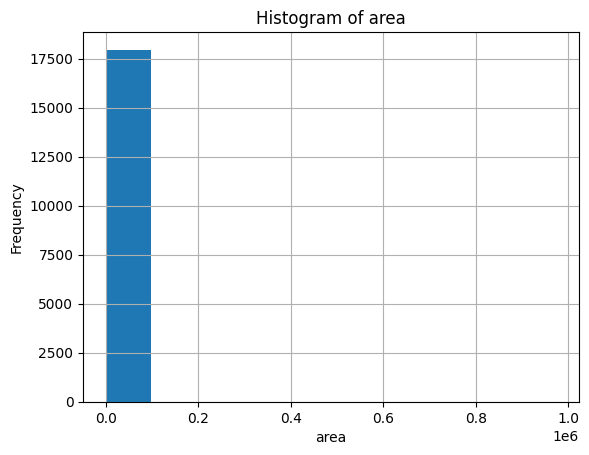

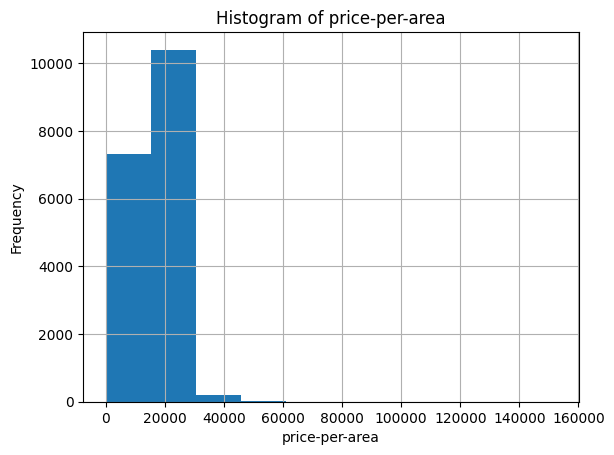

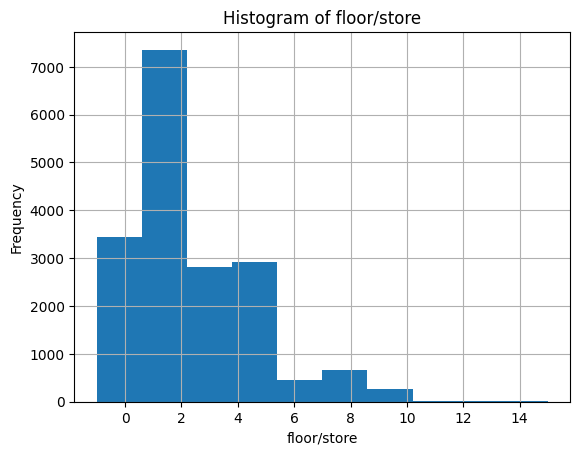

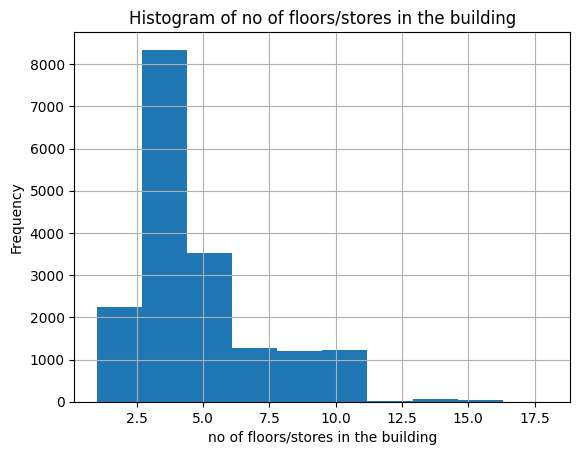

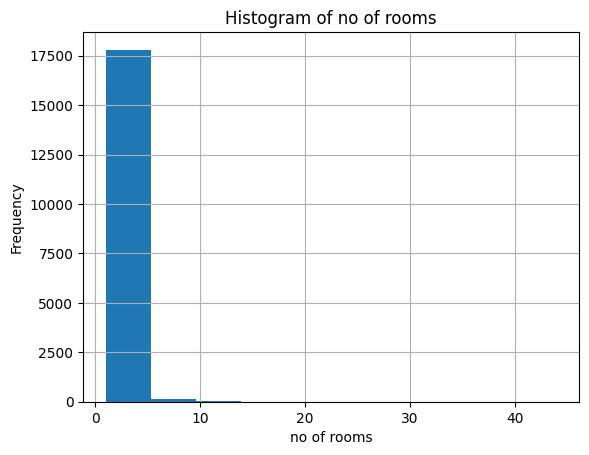

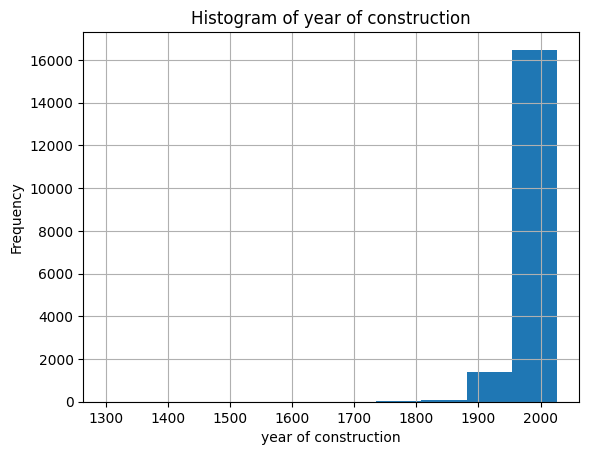

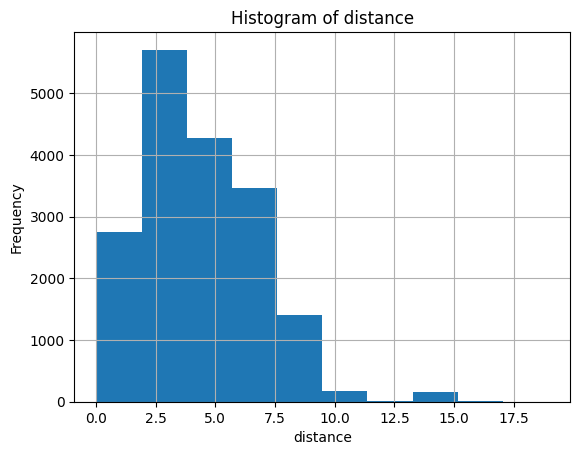

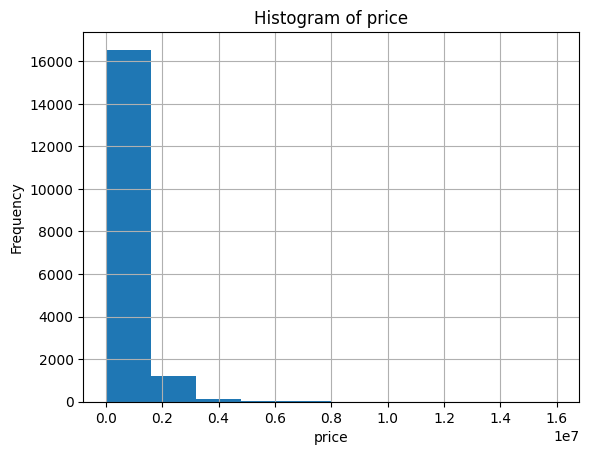

In [239]:
for column in df.select_dtypes(include=['number']).columns:
    plt.figure()
    df[column].plot(kind='hist', bins=10, title=f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

In [240]:
#TODO potencjalnie trzeba wywalić te outliery bo za dużo zamieszania zrobią (model gorsze dawał gorsze rezultaty) - ale przetestuje wersje z oraz bez nich

# One Hot Encoding

In [241]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17949 entries, 0 to 17948
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   area                                 17949 non-null  float64
 1   price-per-area                       17949 non-null  float64
 2   floor/store                          17949 non-null  int64  
 3   no of floors/stores in the building  17949 non-null  int64  
 4   no of rooms                          17949 non-null  int64  
 5   year of construction                 17949 non-null  float64
 6   parking space                        17949 non-null  bool   
 7   market                               17949 non-null  object 
 8   form of ownership                    17949 non-null  object 
 9   distance                             17949 non-null  float64
 10  district                             17949 non-null  object 
 11  price                       

In [242]:
encoder = OneHotEncoder()


categorical_columns = ['market', 'form of ownership', 'district']

categorical_data = df[categorical_columns]


encoded_data = encoder.fit_transform(categorical_data)
encoded_df = pd.DataFrame(encoded_data.toarray(), columns=encoder.get_feature_names_out())

df.drop(columns=categorical_columns, inplace=True)
df_encoded = pd.concat([df, encoded_df], axis=1)

In [243]:
df_encoded.head()

,area,price-per-area,floor/store,no of floors/stores in the building,no of rooms,year of construction,parking space,distance,price,market_pierwotny,...,district_Prądnik Biały,district_Prądnik Czerwony,district_Rajsko,district_Stare Miasto,district_Swoszowice,district_Tytusa Chałubińskiego,district_Wawel,district_Wzgórza Krzesławickie,district_Zwierzyniec,district_Łagiewniki-Borek Fałęcki
0,74.80,14532.09,6,7,3,2016.0,True,6.500728,1087000.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,32.00,17187.50,4,8,1,2012.0,False,5.639111,550000.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,32.30,17028.00,4,10,1,1985.0,False,5.639111,550000.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,155.16,14758.96,0,2,5,2009.0,True,4.662523,2290000.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,139.00,17258.99,1,2,3,2022.0,False,4.662523,2399000.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [244]:
df_encoded.to_csv('model_data.csv', index=False)

print("Data has been successfully saved to 'model_data.csv'.")

Data has been successfully saved to 'model_data.csv'.


# Train/Test split

In [245]:
X = df_encoded.drop('price', axis=1)
y = df_encoded['price']

In [246]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

print(f'Training set size: X_train: {X_train.shape}, y_train: {y_train.shape}')
print(f'Testing set size: X_test: {X_test.shape}, y_test: {y_test.shape}')

Training set size: X_train: (14359, 36), y_train: (14359,)
Testing set size: X_test: (3590, 36), y_test: (3590,)


# Experiments Result (Summary)

In [247]:
#TODO przetestować różne modele w wersji bez inżynierii cech, z inżynierią cech, outliery, bezoutlierów (ewentaulnie różne proporcje test train)